## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 



In [8]:
batch_size = 64
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the train dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance V (1,0.01,0.1) to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9542160	total: 48.2ms	remaining: 48.1s
1:	learn: 0.9354707	total: 49.3ms	remaining: 24.6s
2:	learn: 0.9146525	total: 50.4ms	remaining: 16.7s
3:	learn: 0.8986425	total: 51.5ms	remaining: 12.8s
4:	learn: 0.8799233	total: 52.5ms	remaining: 10.5s
5:	learn: 0.8625395	total: 53.6ms	remaining: 8.87s
6:	learn: 0.8455789	total: 54.8ms	remaining: 7.77s
7:	learn: 0.8284241	total: 55.8ms	remaining: 6.92s
8:	learn: 0.8133431	total: 56.8ms	remaining: 6.25s
9:	learn: 0.7955879	total: 57.8ms	remaining: 5.72s
10:	learn: 0.7810745	total: 58.9ms	remaining: 5.29s
11:	learn: 0.7655702	total: 60.3ms	remaining: 4.97s
12:	learn: 0.7510094	total: 61.3ms	remaining: 4.66s
13:	learn: 0.7363846	total: 62.3ms	remaining: 4.38s
14:	learn: 0.7229229	total: 63.3ms	remaining: 4.15s
15:	learn: 0.7092460	total: 64.3ms	remaining: 3.95s
16:	learn: 0.6966061	total: 65.4ms	remaining: 3.78s
17:	learn: 0.6845109	total: 66.4ms	remaining: 3.62s
18:	learn: 0.6716000	total: 67.4ms	remaining:

88:	learn: 0.3055243	total: 141ms	remaining: 1.45s
89:	learn: 0.3033305	total: 143ms	remaining: 1.44s
90:	learn: 0.3014132	total: 144ms	remaining: 1.43s
91:	learn: 0.2996514	total: 145ms	remaining: 1.43s
92:	learn: 0.2984864	total: 146ms	remaining: 1.42s
93:	learn: 0.2969069	total: 147ms	remaining: 1.41s
94:	learn: 0.2952040	total: 148ms	remaining: 1.41s
95:	learn: 0.2941749	total: 149ms	remaining: 1.4s
96:	learn: 0.2927744	total: 150ms	remaining: 1.39s
97:	learn: 0.2911786	total: 151ms	remaining: 1.39s
98:	learn: 0.2899566	total: 152ms	remaining: 1.38s
99:	learn: 0.2886493	total: 153ms	remaining: 1.37s
100:	learn: 0.2866158	total: 154ms	remaining: 1.37s
101:	learn: 0.2847684	total: 155ms	remaining: 1.36s
102:	learn: 0.2834952	total: 156ms	remaining: 1.36s
103:	learn: 0.2816879	total: 157ms	remaining: 1.35s
104:	learn: 0.2806120	total: 158ms	remaining: 1.35s
105:	learn: 0.2792832	total: 159ms	remaining: 1.34s
106:	learn: 0.2774456	total: 160ms	remaining: 1.34s
107:	learn: 0.2760989	tot

207:	learn: 0.1951047	total: 270ms	remaining: 1.03s
208:	learn: 0.1945823	total: 271ms	remaining: 1.02s
209:	learn: 0.1940888	total: 272ms	remaining: 1.02s
210:	learn: 0.1935482	total: 273ms	remaining: 1.02s
211:	learn: 0.1928945	total: 274ms	remaining: 1.02s
212:	learn: 0.1923818	total: 275ms	remaining: 1.02s
213:	learn: 0.1918722	total: 276ms	remaining: 1.01s
214:	learn: 0.1912523	total: 278ms	remaining: 1.01s
215:	learn: 0.1907854	total: 279ms	remaining: 1.01s
216:	learn: 0.1901590	total: 280ms	remaining: 1.01s
217:	learn: 0.1894606	total: 281ms	remaining: 1.01s
218:	learn: 0.1889462	total: 282ms	remaining: 1s
219:	learn: 0.1885080	total: 283ms	remaining: 1s
220:	learn: 0.1880181	total: 284ms	remaining: 1s
221:	learn: 0.1874509	total: 285ms	remaining: 1000ms
222:	learn: 0.1869555	total: 286ms	remaining: 998ms
223:	learn: 0.1864396	total: 287ms	remaining: 996ms
224:	learn: 0.1860652	total: 289ms	remaining: 994ms
225:	learn: 0.1855738	total: 290ms	remaining: 992ms
226:	learn: 0.184890

332:	learn: 0.1459173	total: 404ms	remaining: 810ms
333:	learn: 0.1456364	total: 406ms	remaining: 809ms
334:	learn: 0.1454977	total: 407ms	remaining: 808ms
335:	learn: 0.1451332	total: 408ms	remaining: 806ms
336:	learn: 0.1450603	total: 409ms	remaining: 804ms
337:	learn: 0.1448709	total: 410ms	remaining: 803ms
338:	learn: 0.1446775	total: 411ms	remaining: 801ms
339:	learn: 0.1441571	total: 412ms	remaining: 800ms
340:	learn: 0.1439754	total: 413ms	remaining: 799ms
341:	learn: 0.1439082	total: 414ms	remaining: 797ms
342:	learn: 0.1436146	total: 415ms	remaining: 796ms
343:	learn: 0.1434323	total: 416ms	remaining: 794ms
344:	learn: 0.1430701	total: 417ms	remaining: 793ms
345:	learn: 0.1427138	total: 419ms	remaining: 791ms
346:	learn: 0.1422798	total: 420ms	remaining: 790ms
347:	learn: 0.1419346	total: 421ms	remaining: 788ms
348:	learn: 0.1416760	total: 422ms	remaining: 787ms
349:	learn: 0.1412310	total: 423ms	remaining: 786ms
350:	learn: 0.1408484	total: 424ms	remaining: 784ms
351:	learn: 

459:	learn: 0.1150008	total: 540ms	remaining: 634ms
460:	learn: 0.1147181	total: 541ms	remaining: 632ms
461:	learn: 0.1145906	total: 542ms	remaining: 631ms
462:	learn: 0.1142249	total: 543ms	remaining: 630ms
463:	learn: 0.1138621	total: 544ms	remaining: 628ms
464:	learn: 0.1135918	total: 545ms	remaining: 627ms
465:	learn: 0.1133485	total: 546ms	remaining: 626ms
466:	learn: 0.1131290	total: 547ms	remaining: 625ms
467:	learn: 0.1129397	total: 548ms	remaining: 623ms
468:	learn: 0.1127626	total: 549ms	remaining: 622ms
469:	learn: 0.1124648	total: 550ms	remaining: 621ms
470:	learn: 0.1122808	total: 551ms	remaining: 619ms
471:	learn: 0.1120352	total: 552ms	remaining: 618ms
472:	learn: 0.1117121	total: 554ms	remaining: 617ms
473:	learn: 0.1114588	total: 555ms	remaining: 615ms
474:	learn: 0.1112843	total: 556ms	remaining: 614ms
475:	learn: 0.1111335	total: 557ms	remaining: 613ms
476:	learn: 0.1109079	total: 558ms	remaining: 612ms
477:	learn: 0.1106832	total: 559ms	remaining: 610ms
478:	learn: 

587:	learn: 0.0918753	total: 674ms	remaining: 472ms
588:	learn: 0.0917731	total: 675ms	remaining: 471ms
589:	learn: 0.0916335	total: 676ms	remaining: 470ms
590:	learn: 0.0914508	total: 677ms	remaining: 469ms
591:	learn: 0.0912981	total: 679ms	remaining: 468ms
592:	learn: 0.0912703	total: 679ms	remaining: 466ms
593:	learn: 0.0911588	total: 681ms	remaining: 465ms
594:	learn: 0.0909481	total: 682ms	remaining: 464ms
595:	learn: 0.0907875	total: 683ms	remaining: 463ms
596:	learn: 0.0905623	total: 684ms	remaining: 461ms
597:	learn: 0.0904229	total: 685ms	remaining: 460ms
598:	learn: 0.0902720	total: 686ms	remaining: 459ms
599:	learn: 0.0901725	total: 687ms	remaining: 458ms
600:	learn: 0.0899974	total: 688ms	remaining: 457ms
601:	learn: 0.0897423	total: 689ms	remaining: 455ms
602:	learn: 0.0896872	total: 690ms	remaining: 454ms
603:	learn: 0.0895709	total: 691ms	remaining: 453ms
604:	learn: 0.0894323	total: 692ms	remaining: 452ms
605:	learn: 0.0893056	total: 693ms	remaining: 451ms
606:	learn: 

705:	learn: 0.0768645	total: 803ms	remaining: 335ms
706:	learn: 0.0767860	total: 804ms	remaining: 333ms
707:	learn: 0.0766854	total: 806ms	remaining: 332ms
708:	learn: 0.0764778	total: 807ms	remaining: 331ms
709:	learn: 0.0764192	total: 808ms	remaining: 330ms
710:	learn: 0.0761678	total: 809ms	remaining: 329ms
711:	learn: 0.0760444	total: 810ms	remaining: 328ms
712:	learn: 0.0759169	total: 811ms	remaining: 326ms
713:	learn: 0.0757827	total: 812ms	remaining: 325ms
714:	learn: 0.0757170	total: 813ms	remaining: 324ms
715:	learn: 0.0756811	total: 814ms	remaining: 323ms
716:	learn: 0.0755783	total: 815ms	remaining: 322ms
717:	learn: 0.0754861	total: 816ms	remaining: 321ms
718:	learn: 0.0754343	total: 817ms	remaining: 319ms
719:	learn: 0.0752912	total: 818ms	remaining: 318ms
720:	learn: 0.0751644	total: 819ms	remaining: 317ms
721:	learn: 0.0750029	total: 820ms	remaining: 316ms
722:	learn: 0.0748671	total: 821ms	remaining: 315ms
723:	learn: 0.0747815	total: 822ms	remaining: 314ms
724:	learn: 

830:	learn: 0.0641253	total: 935ms	remaining: 190ms
831:	learn: 0.0640040	total: 936ms	remaining: 189ms
832:	learn: 0.0639814	total: 937ms	remaining: 188ms
833:	learn: 0.0639288	total: 938ms	remaining: 187ms
834:	learn: 0.0638747	total: 939ms	remaining: 186ms
835:	learn: 0.0637808	total: 940ms	remaining: 184ms
836:	learn: 0.0636686	total: 941ms	remaining: 183ms
837:	learn: 0.0636514	total: 942ms	remaining: 182ms
838:	learn: 0.0635559	total: 943ms	remaining: 181ms
839:	learn: 0.0634761	total: 944ms	remaining: 180ms
840:	learn: 0.0634089	total: 945ms	remaining: 179ms
841:	learn: 0.0633181	total: 947ms	remaining: 178ms
842:	learn: 0.0631688	total: 948ms	remaining: 177ms
843:	learn: 0.0631077	total: 949ms	remaining: 175ms
844:	learn: 0.0629972	total: 950ms	remaining: 174ms
845:	learn: 0.0628336	total: 951ms	remaining: 173ms
846:	learn: 0.0627315	total: 952ms	remaining: 172ms
847:	learn: 0.0627031	total: 953ms	remaining: 171ms
848:	learn: 0.0626080	total: 954ms	remaining: 170ms
849:	learn: 

953:	learn: 0.0541819	total: 1.07s	remaining: 51.5ms
954:	learn: 0.0541199	total: 1.07s	remaining: 50.4ms
955:	learn: 0.0540201	total: 1.07s	remaining: 49.3ms
956:	learn: 0.0539756	total: 1.07s	remaining: 48.2ms
957:	learn: 0.0539153	total: 1.07s	remaining: 47ms
958:	learn: 0.0538533	total: 1.07s	remaining: 45.9ms
959:	learn: 0.0538182	total: 1.07s	remaining: 44.8ms
960:	learn: 0.0537690	total: 1.08s	remaining: 43.7ms
961:	learn: 0.0536892	total: 1.08s	remaining: 42.5ms
962:	learn: 0.0536348	total: 1.08s	remaining: 41.4ms
963:	learn: 0.0536209	total: 1.08s	remaining: 40.3ms
964:	learn: 0.0536086	total: 1.08s	remaining: 39.2ms
965:	learn: 0.0535769	total: 1.08s	remaining: 38.1ms
966:	learn: 0.0535236	total: 1.08s	remaining: 36.9ms
967:	learn: 0.0534803	total: 1.08s	remaining: 35.8ms
968:	learn: 0.0534195	total: 1.08s	remaining: 34.7ms
969:	learn: 0.0533831	total: 1.08s	remaining: 33.6ms
970:	learn: 0.0533777	total: 1.09s	remaining: 32.5ms
971:	learn: 0.0532973	total: 1.09s	remaining: 31

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

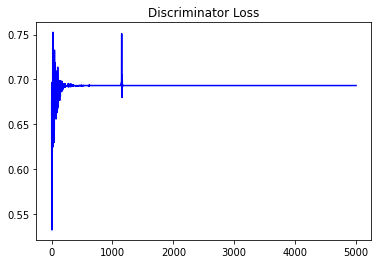

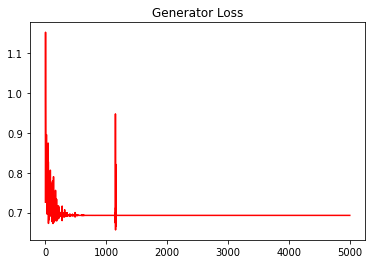

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

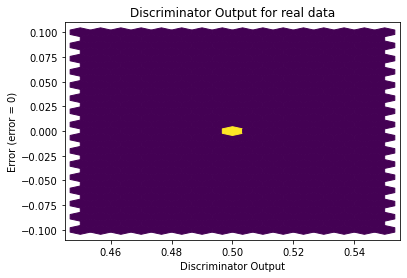

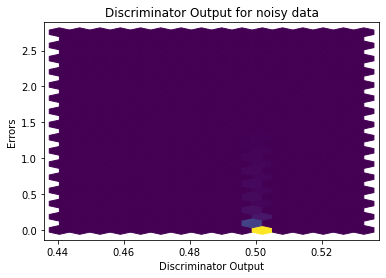

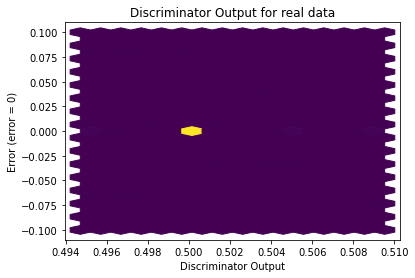

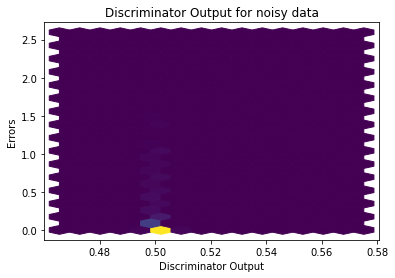

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


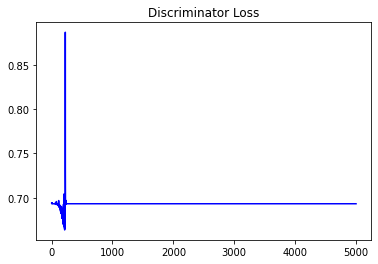

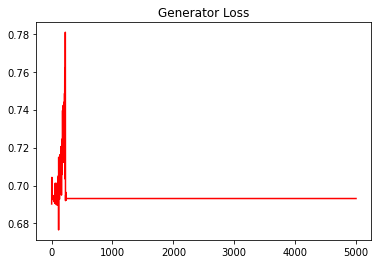

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)


In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

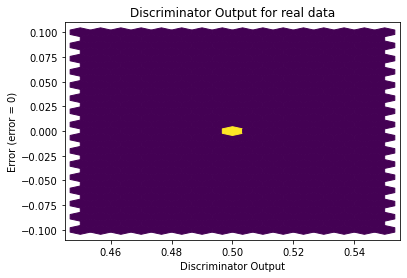

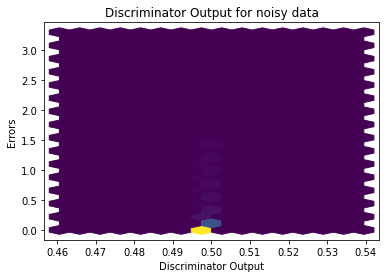

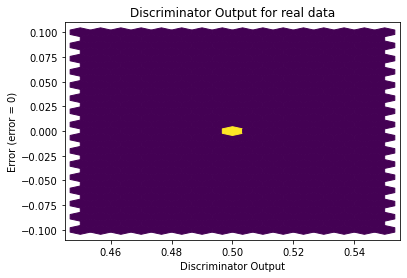

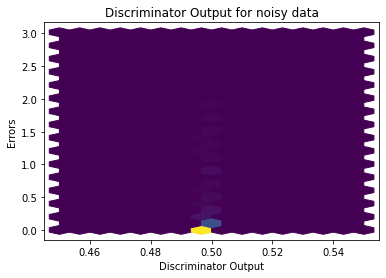

In [18]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0253]], device='cuda:0', requires_grad=True)
